In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [59]:
class Net(nn.Module):
    def __init__(self, ins, hidden, outs, nonlinear = 'sigmoid', classification = True):
        super().__init__()
        self.hidden = nn.Linear(in_features = ins, out_features = hidden)
        self.output = nn.Linear(in_features = hidden, out_features = outs)
        self.classification = classification
        if self.classification:
            self.softmax = nn.Softmax(dim=1)
            self.lossfn = nn.CrossEntropyLoss()
        else:
            self.lossfn = nn.MSELoss()
        if(nonlinear == 'sigmoid'):
            self.nonlinear = torch.sigmoid
        else:
            self.nonlinear = F.relu
        print(self)
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.title('MSE at each training epoch')
    def forward(self, x):
        x = self.nonlinear(self.hidden(x))
        x = self.output(x)
        return x
    def train(self, x_train, y_train, x_test, y_test, epochs = 1000):
        self.optimizer = torch.optim.Adam(self.parameters(), lr = 0.01)
        losses=[]
        test_loss=[]
        for i in range(epochs):
            self.optimizer.zero_grad()
            y_hat = self.forward(x_train)
            loss = self.lossfn(y_hat, y_train)
            losses.append(loss)
            loss.backward()
            self.optimizer.step()
            with torch.no_grad():
                y_pred = self.forward(x_test)
                test_loss.append(self.lossfn(y_pred, y_test))
            
        plt.plot(np.arange(0, epochs),  losses, label = 'training')
        plt.plot(np.arange(0, epochs),  test_loss, label = 'test')
        plt.legend()

In [60]:
raw_data = np.genfromtxt('iris.data', delimiter=',', dtype = None, encoding = None)
num_label_data = []

iris_dict = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

for row in raw_data:
    sep_len, sep_width, pet_len, pet_width, label = row
    label = iris_dict[label]
    #using the max of each attribute (provided in iris.names on the dataset) to normalize
    sep_len /= 7.6
    sep_width /= 4.4
    pet_len /= 6.9
    pet_width /= 2.5
    num_label_data.append((sep_len, sep_width, pet_len, pet_width, int(label)))

np.random.shuffle(num_label_data)

train_test_spl = int(len(raw_data) * 0.85)
train = np.array(num_label_data[:train_test_spl])
test = np.array(num_label_data[train_test_spl:])
x_train = torch.FloatTensor(train[:, :-1])
y_train = torch.LongTensor(train[:, -1])
x_test = torch.FloatTensor(test[:, :-1])
y_test = torch.LongTensor(test[:, -1])

Net(
  (hidden): Linear(in_features=4, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
  (lossfn): CrossEntropyLoss()
)


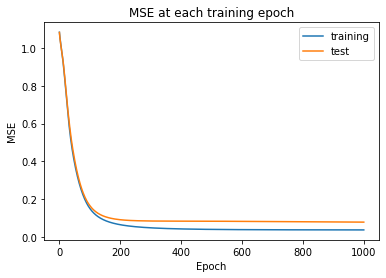

In [61]:
net_iris = Net(4, 20, 3, nonlinear = 'relu')
net_iris.train(x_train, y_train, x_test, y_test)

In [74]:
import pandas as pd
from sklearn import preprocessing

raw_data = pd.read_csv('forestfires.csv')
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
day_map = {'sun': 1, 'mon': 2, 'tue': 3, 'wed':4, 'thu':5, 'fri':6, 'sat': 7}
raw_data.month = raw_data.month.map(month_map)
raw_data.day = raw_data.day.map(day_map)

min_max_scaler = preprocessing.MinMaxScaler()
inp = min_max_scaler.fit_transform(inp)
np.random.shuffle(inp)
#inp = raw_data.values
train_test_spl_reg = int(len(inp) * 0.85)
train = np.array(inp[:train_test_spl])
test = np.array(inp[train_test_spl:])
y_train, y_test = [], []
for y in train[:, -1]:
    y_train.append([y])
    
for y in test[:, -1]:
    y_test.append([y])
y_train = np.array(y_train)
x_train = torch.FloatTensor(train[:, :-1])
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(test[:, :-1])
y_test = torch.FloatTensor(y_test)

Net(
  (hidden): Linear(in_features=12, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
  (lossfn): MSELoss()
)


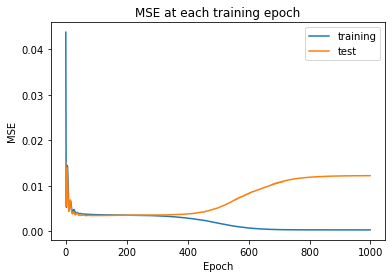

In [75]:
net2 = Net(12, 20, 1, nonlinear = 'relu', classification = False)
net2.train(x_train, y_train, x_test, y_test)